<h><center><b><font size="5">MÉTODOS NUMÉRICOS PARA ECUACIONES DIFERENCIALES CON CONDICIONES DE FRONTERA</font></b></center></h>
*Basado en el libro  Neha Yadav, Anupam Yadav, Manoj Kumar (auth.) - An Introduction to Neural Network Methods for Differe*

### **Método de Shooting**

Se basa en convertir una ecuación diferencial con condiciones de frontera en una ecuación diferencial de condiciones iniciales.

Supongamos que tenemos una ecuación diferencial de la forma

\begin{align}
    y'' = f(x,y,y'); \;\; y(x=a) = \alpha, \;\;y(x=b) = \beta
\end{align}

Podemos convertirla en una ecuación diferencial de condición inicial asumiendo que $y(a)=\alpha$ es nuestra primera condición inicial y suponiendo que la condición inicial para la derivada está dada por una constante "arbitraria" $y'(a) = k$, tal que nuestra ecuación toma la forma

\begin{equation}
    y'' = f(x,y,y'); \;\; y(a) = \alpha, \;\;y'(a) = k
\end{equation}

la idea es que la constante $k$ llegue a tener el valor apropiado tal que $y(b) = \beta$, es decir, necesitamos resolver la ecuación . Esta ecuación diferencial puede ser resuelta por métodos de condiciones iniciales como Euler o Runge-Kutta. Para encontrar el valor apropiado de $k$ se puede definir una función $\phi(k) = y_k(b) - \beta$, tal que obtengamos una problema de hallar la raíz de una ecuación $ 0 = y_k(b) - \beta$, que puede ser encontrada mediante el método de la secante o el método de Newton-Raphson.

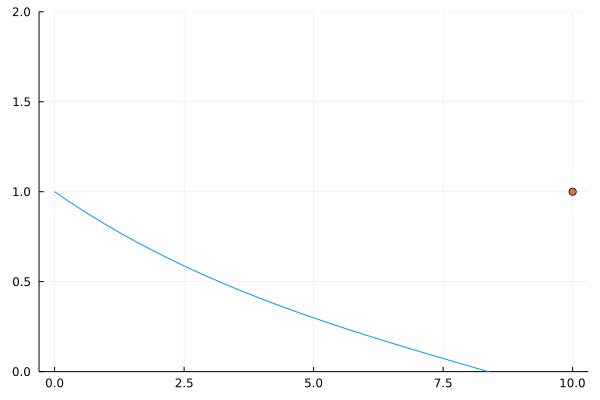

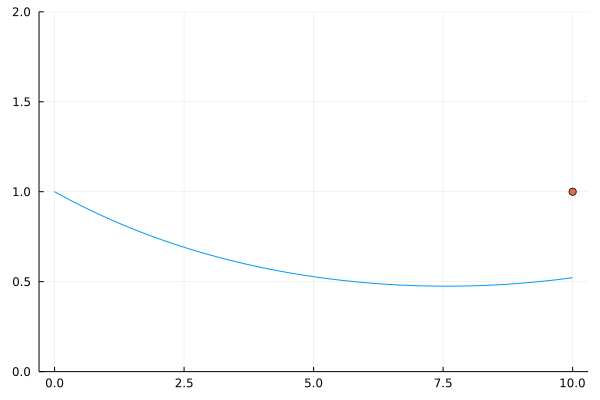

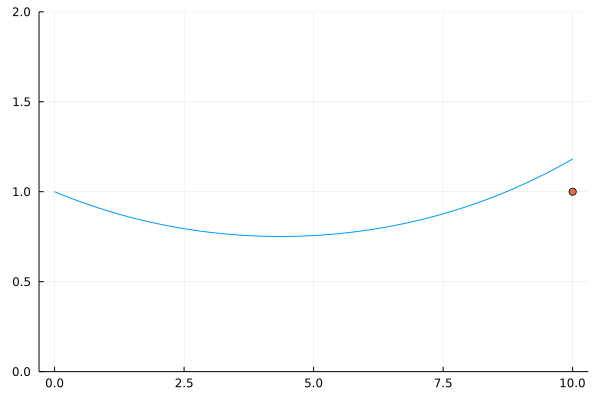

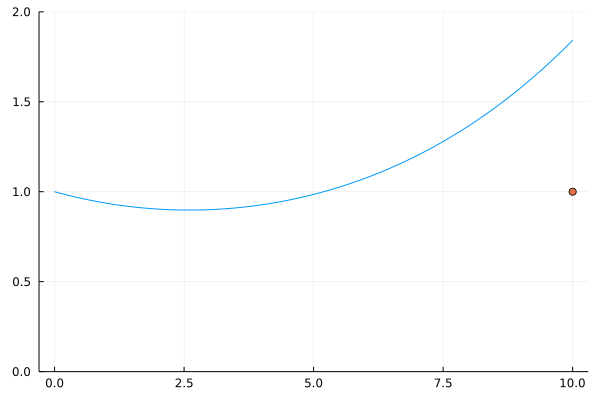

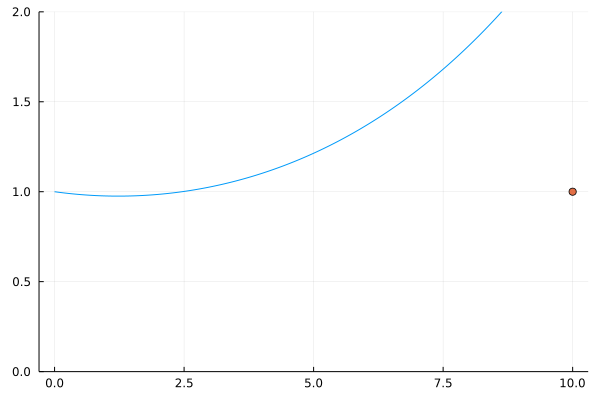

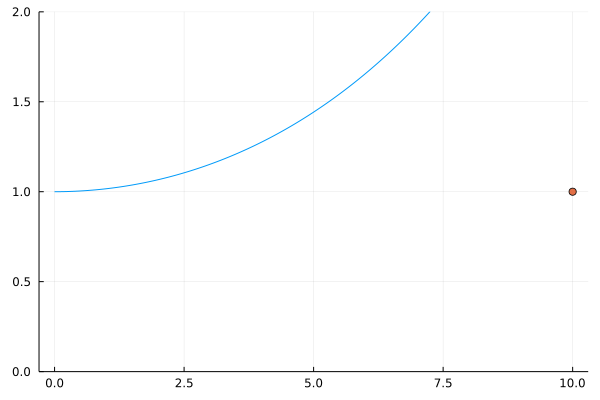

In [35]:
using Plots

#angular velocity
ω = 2
vw = 11

function wave_EDO(t0, q0)
    #=
    dx/dt = f[1]
    dy/dt = f[2]
    dvx/dt = f[3]
    dvy/dt = f[4]
    =#
    y = q0[1]
    v = q0[2]
    f = zeros(2)
    f[1] = v
    f[2] = (ω^2/vw^2)*y
    return f
end

function RungeKutta4(q0, t0, tf, n, f)
    """
    q0: x, y, vx, vy initial conditions
    t0: initial time
    tf: final time
    n: number of steps
    f: right hand side of the differential equation
    """
    t = LinRange(t0,tf,n) #Derivation variable interval 
    q = zeros(length(q0),n) #array for storing the integrated variables
    q[:,1] .= q0 #initial conditions
    for i in 2:n
        dt = t[i] - t[i-1] #Derivation variable step size
        k1 = dt*f(t[i-1], q[:,i-1])
        k2 = dt*f(t[i-1] + dt/2, q[:,i-1] +k1[:]/2)
        k3 = dt*f(t[i-1] + dt/2, q[:,i-1] +k2[:]/2)
        k4 = dt*f(t[i-1] + dt, q[:,i-1] +k3[:])
        q[:,i] = q[:,i-1] + (k1 + 2*k2 + 2*k3 + k4)/6 #update of q in each time step
    end
    return q #Final integration of the differential equation
end

function b_problem_shooting(v0)
    yf = 1
    x0 = 0
    xf = 10
    N = 300 #Total steps
    Q0 = zeros(2)
    Q0[1] = 1. # AU -> y0
    Q0[2] = v0 # AU -> v0

    x = LinRange(x0, xf, N)
    result = RungeKutta4(Q0, x0, xf, N, wave_EDO)
    p = plot(x, result[1,:])
    return result[1,:]
end

x0 = 0
xf = 10
N = 300 #Total steps
x = LinRange(x0, xf, N)

v_guess = LinRange(-0.2,0,6)

for el in v_guess
    p = plot(x, b_problem_shooting(el), ylim = (0,2), legend = false)
    p = scatter!([10],[1])
    display(p)
end

-0.001648354111239314

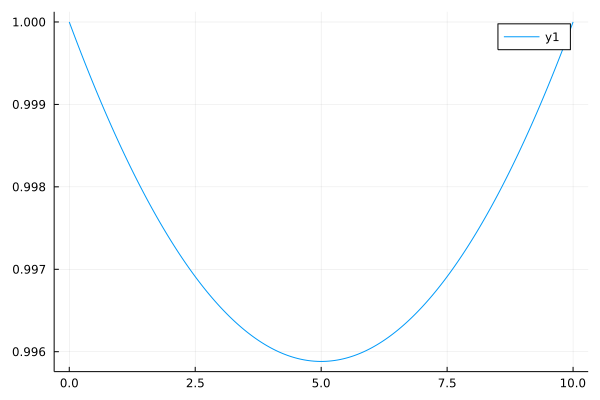

3.032787354584343e-10

In [2]:
function b_problem(v0, plotting=true)
    yf = 1
    x0 = 0
    xf = 10
    N = 300 #Total steps
    Q0 = zeros(2)
    Q0[1] = 1. # AU -> y0
    Q0[2] = v0 # AU -> v0

    x = LinRange(x0, xf, N)
    result = RungeKutta4(Q0, x0, xf, N, wave_EDO)
    
    if plotting == true
        p = plot(x, result[1,:])
        display(p)
    end
    phi = result[1,length(result[1,:])] - 1
    return phi
end

function root_bisection(x_a, x_b, x_c, pol, epsilon)  
    while abs(pol(x_c, false)) > epsilon
        x_c = (x_a + x_b)/2.
        if pol(x_a, false)*pol(x_c, false) < 0
            x_b = x_c
        else
            x_a = x_c
        end
    end
    return x_c
end

va = -4
vb = 7
vc = 1. #valor de inicialización
epsilon = 1e-8

v_root = root_bisection(va, vb, vc, b_problem, epsilon)
print(v_root)
b_problem(v_root)

### **Método de diferencias finitas**

Usando un grid, aproximamos las derivadas a diferencias. El dominio de la ecuación ahora estará compuesto por los puntos del grid, que se denominan *puntos nodales*.

**Por ejemplo:**
***La Ecuación Lineal de Advección*** (Tomado de: Notas Astrofísica 2022-2 - Eduard Alexis Larrañaga)

Considere la ecuación de continuidad,

\begin{equation}
\frac{\partial \rho}{\partial t} + \vec{\nabla} \cdot (\rho \vec{v}) = 0
\end{equation}

en el caso particular de un sistema unidimensional y para un fluido que se mueve con velocidad constante,

\begin{equation}
\frac{\partial \rho}{\partial t} + {v}_x \frac{\partial \rho}{\partial x}  = 0.
\end{equation}

Esta es un ejemplo de los **sistemas hiperbólicos de primer orden** en una dimensión espacial y se denomina la **ecuación lineal de advección**. Utilizando la función $\psi=\psi(t,x)$ dentro de esta ecuación, se tiene

\begin{equation}
\partial_t \psi + v \partial_x \psi = 0\,\,,
\end{equation}

donde $v$ es una constante. Una solución exacta de esta ecuación está dada por cualquier función que dependa de los argumentos

\begin{equation}
\psi(t,x) = \psi(x\pm vt)\,\,.
\end{equation}

Hay diferentes métodos para resolverla. Entre ellos dos se encuentra

### 1. Discretización FTCS 

Este método de diferencias finitas esta basado en discretizar la derivada temporal hacia adelante y la derivada espacial centrada. Su nombre proviene de las siglas en inglés (**F**orward in **T**ime, **C**entered in **S**pace: FTCS).  Esta discretización lleva de inmediato a la relación 

\begin{equation}
  \psi^{(n+1)}_j = \psi^{(n)}_j - \frac{v \Delta t}{2\Delta x} \left(\psi^{(n)}_{j+1} - \psi^{(n)}_{j-1}\right)\,\,.
\end{equation}

En esta ecuación, el índice $n$ hace referencia a la discretización temporal mientras que el índice $j$ se refiere a la discretización espacial. 

**Condiciones de frontera**

Es importante notar que en este método, la definición de la malla necesita de un criterio para tratar las condiciones de frontera. Algunos de los posibles criterios son:

- *Outflow* : la información de los últimos puntos internos se copia en los puntos de frontera. En este caso el perfil sale del dominio de integración sin devolverse.

- *Condición Periódica* : La información de los puntos de la frontera en uno de los extremos se copia en el otro extremo. En esta caso, el perfil sale por uno de los extremos del dominio de integración para re-aparecer por el otro extremo.



dt = 0.07000700070007002
dx = 0.10010010010010009


┌ Info: Saved animation to 
│   fn = /hdd/1-PRINCIPAL-2022-1/2-SEMILLERO/2-PRESENTATION-Diff_equations_and_numerical_methods/advection.gif
└ @ Plots /home/juanessao2000/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/hdd/1-PRINCIPAL-2022-1/2-SEMILLERO/2-PRESENTATION-Diff_equations_and_numerical_methods/advection.gif")
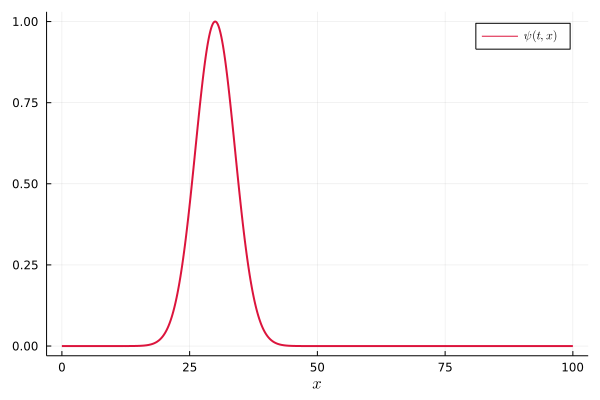

In [3]:
using Plots
using Printf
using LaTeXStrings

# Definition of the initial Gaussian profile
function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end

x = LinRange(0,100,200); y = gaussian.(x); 
plot(x, y, title = "Función Gaussiana", label = L"\psi_0(x)", lw = 2, linecolor="crimson")
xlabel!(L"x")
ylabel!(L"\psi(x)")

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 1000
xgrid = LinRange(x_i, x_f, Nx)

t_i = 0.
t_f = 700.
Nt = 10000
tgrid = LinRange(t_i, t_f, Nt)


# Velocity of the advection
v = 0.1


# FTCS Method
function FTCS(psi0, tgrid, xgrid ; boundary="outflow")
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    println("dt = $dt")
    println("dx = $dx")
    
    psi = zeros(length(tgrid), length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    for n in 1:length(tgrid)-1 , j in 2:length(xgrid)-1
            psi[n+1,j] = psi[n,j] - ((v*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,end-1]
        else # Periodic boudnary conditions
            if v>0
                psi[n+1,1] = psi[n+1,end-1]
                psi[n+1,end] = psi[n+1,end-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,1]
            end
        end
    end
    return psi
end

psi = FTCS(gaussian, tgrid, xgrid, boundary="periodic")

plot(xgrid, psi[1,:], title = "Función Gaussiana", label = L"t = "*"$t_i", lw = 2, linecolor="crimson")
plot!(xgrid, psi[end,:], title = "Función Gaussiana", label = L"t = "*"$t_f", lw = 2, linecolor="steelblue")
xlabel!(L"x")

anim = @animate for i in 1:50:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson")
    xlabel!(L"x")
end

gif(anim, "advection.gif", fps = 15)


### 2. Método Lax-Friedrich

El método Lax-Friedrichs, al igual que el FTCS, es de primer orden en el tiempo y segundo orden en el espacio. La ecuación correspondiente es

\begin{equation}
\psi_{j}^{(n+1)} = \frac{1}{2}\left(\psi^{(n)}_{j+1} + \psi^{(n)}_{j-1}\right) - 
\frac{v \Delta t}{2\Delta x} \left(\psi^{(n)}_{j+1} - \psi^{(n)}_{j-1}\right)\,\,.
\end{equation}

De esta ecuación  se puede comprobar que este método difiere del método FTCS en que se ha logrado la estabilidad para $\alpha \le 1$ al utilizar el promedio del antiguo valor (i.e. en $n$) en los puntos $j+1$ y $j-1$ para calcular el valor actualizado (i.e, en $n+1$) en el punto $j$. 
Es posible demostrar que este tratamiento es equivalente a incluir un termino disipativo en las ecuaciones (de tal manera que se amortigua la inestabilidad del método FTCS) y por ello conelleva a una menor precisión que se manifiesta como una disipación del perfil inicial.

dt = 1.0010010010 
dx = 0.1001001001

┌ Info: Saved animation to 
│   fn = /hdd/1-PRINCIPAL-2022-1/2-SEMILLERO/2-PRESENTATION-Diff_equations_and_numerical_methods/Lax-Friederich_gauss.gif
└ @ Plots /home/juanessao2000/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/hdd/1-PRINCIPAL-2022-1/2-SEMILLERO/2-PRESENTATION-Diff_equations_and_numerical_methods/Lax-Friederich_gauss.gif")
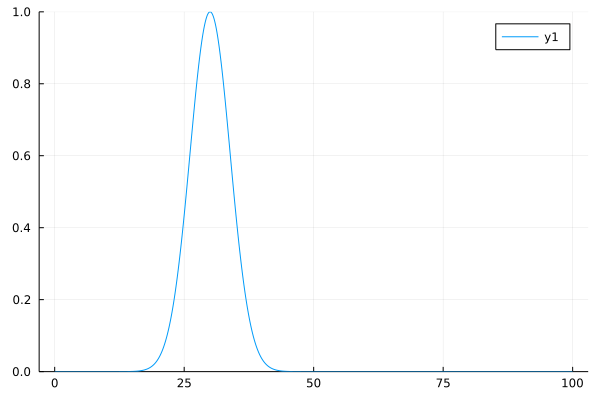

In [4]:
using Plots
using Printf
using LaTeXStrings

#Initial profile condition function
function Gaussian_profile(x)
    x0 = 30
    sigma = sqrt(15)
    prof = exp(-(x-x0)^2/(2*sigma^2))
    return prof
end

#spacial grid
x_i = 0
x_f = 100
Nx = 1000
x = LinRange(x_i, x_f, Nx)
#Criterio CFL
CFL = 0.9
#Advection velocity
v = 0.1

dx = x[2] - x[1]

dt = CFL*dx/abs(v)


#time grid
t_i = 0
t_f = 1000
Nt = round(Int64, t_f - t_i/dt)
t = LinRange(t_i, t_f, Nt)


using Plots 
using Printf

dt = t[2] - t[1]
dx = x[2] - x[1]


#Integration function with periodical frontier conditions
function Lax_Friederich(Psi0, t, x, v, dt, dx, boundary = "periodical")
    nx = length(x)
    nt = length(t)
    psi = zeros(nt, nx)
    psi[1,1:length(x)] = Psi0.(x)
    nu = (v*dt)/dx
    for n in 1:length(t)-1
        for j in 2:length(x)-1
            psi[n+1,j] = 0.5*(psi[n,j+1] + psi[n,j-1]) - 0.5*nu*(psi[n,j+1] - psi[n,j-1])
        end
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,nx] = psi[n+1,nx-1]
        else # Periodic boudnary conditions
            if v>0
                psi[n+1,1] = psi[n+1,nx-1]
                psi[n+1,nx] = psi[n+1,nx-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,nx] = psi[n+1,1]
            end
        end
    end
    return psi
end

psi_lf_gauss = Lax_Friederich(Gaussian_profile, t, x, v, dt, dx)
@printf("dt = %0.10f \n", dt)
@printf("dx = %0.10f", dx)
anim = @animate for i in 1:50:Nt 
    plot(x, psi_lf_gauss[i,:], ylim = (0,1))
end
gif(anim, "Lax-Friederich_gauss.gif", fps = 15)

### **Método de elementos finitos**

En este método se divide la ecuación diferencial con problema de condiciones de frontera en subdominios descritos por polinomios sencillos que deben cumplir con las mismas condiciones de frontera en el mismo dominio.

Por ejemplo, tomemos la ecuación de Poisson en una dimensión

\begin{align}
    -u'' = f(x)\,,
\end{align}
con condiciones de frontera

\begin{align*}
    u(0) &= 0 & u(1) = 0
\end{align*}

Supongamos ahora que podemos expresar la solución $u = u(x)$ como una suma finita de polinomios $\phi_i = \phi_i(x)$ que cumplen las mismas condiciones de frontera

\begin{equation}
    u(x) = \sum_{i=1}^m \alpha_i \phi_i(x)\,,
\end{equation}

donde $\alpha_i$ son los coeficientes que acompañan a cada polinomio.

Ahora, multipliquemos a ambos lados de la ecuación de Poisson por los polinomios e integremos en el dominio

\begin{split}
    u''+f(x) &= 0\,,\\
    [u''(x) + f(x)]\phi_i(x) &= 0\,,\\
    \int_0^1 [u''(x) + f(x)]\phi_i(x) dx &= 0\,,
\end{split}

luego, integrando por partes, tenemos en el primer sumando que

\begin{split}
    \int_0^1 u'(x)\phi_i'(x)\,dx - [u'(1)\phi_i(1) - u'(0)\phi_i(0)] + \int_0^1 f(x)\phi_i(x)\,dx = 0\,,
\end{split}

y como $\phi$ cumple con las condiciones de frontera

\begin{split}
    \int_0^1 [u'(x)\phi_i'(x) + f(x)\phi_i(x)]\,dx = 0\,.
\end{split}

Y definiendo la notación $\int_0^1 g(x)h(x)dx = (g, h)$ para el producto escalar de funciones,

\begin{equation}
    (u', \phi_i') = (f, \phi_i)\,.
\end{equation}

Luego, sustituyendo por la representación en polinomios

\begin{split}
    \left(\left(\sum_{i=1}^m \alpha_i \phi_i(x)\right)', \phi_i'\right) &= (f, \phi_i)\\
    \left(\sum_{j=1}^m \alpha_i \phi_j'(x), \phi_i'\right) &= (f, \phi_i)\\
\end{split}

Así, conociendo el grupo de polinomios utilizados, solo es necesario despejar los coeficientes $\alpha_i$ para obtener la aproximación de la solución $u$ en estos polinomios.

### **Método de Volumenes Finitos**


En este método de discretización, el dominio también se divide en intervalos igualmente espaciados pero el valor de la función se obtiene al tomar su promedio en cada intervalo. Por ejemplo, en el intervalo $i$, cuyos puntos extremos son $x_{i-\frac{1}{2}}$ y $x_{i+\frac{1}{2}}$, el valor de la función será

\begin{equation}
\langle f_i \rangle = \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} f(x) dx
\end{equation}

En la figura, el valor promedio de la función esta representado por la linea horizontal dentro de cada interevalo. 

Utilizando una expansión en serie de Taylor, se tiene

\begin{equation}
f(x) = f(x_i) + f'(x_i) (x-x_i) + \frac{1}{2} f''(x_i) (x - x_i)^2 + ...
\end{equation}

y por lo tanto, a segundo orden en $\Delta x$, 

\begin{equation}
\langle f_i \rangle \sim f(x_i) + \mathcal{O} (\Delta x ^2).
\end{equation}

Esta ecuación muestra que el promedio en cada una de las zonas se puede aproximar como el valor de la función en el punto medio del intervalo.

####  ***Aplicación del Método de Volumenes Finitos a la Ecuación de Conservación*** (Tomado de: Notas Astrofísica 2022-2 - Eduard Alexis Larrañaga)

El método de volumenes finitos es muy útil al aplicarse a ecuaciones relacionadas con leyes de conservación. Por ejemplo, considere la ecuación de continuidad

\begin{equation}
\frac{\partial \psi}{\partial t} + \nabla \cdot F(\psi) = 0,
\end{equation}

donde $\psi(t,x,y,z)$ es el *vector* de cantidades conservadas y $F(\psi)$ representa el flujo de estas cantidades.

En el caso unidimensional, donde $\psi = \psi(t,x)$, esta ecuación se reduce a

\begin{equation}
\frac{\partial \psi}{\partial t} = - \frac{\partial F(\psi)}{\partial x} .
\end{equation}


Al introducir una malla de discretización e integrar la ecuación diferencial en uno de los itervalos definidos y normalizar por  $\Delta x$ se obtiene

\begin{align}
\frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \frac{\partial \psi}{\partial t} dx = &- \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}  \frac{\partial F(\psi)}{\partial x} dx \\
\frac{\partial }{\partial t} \left[ \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \psi dx \right] = &- \frac{1}{\Delta x} \left[ \left. F(\psi)\right|_{x_{i+\frac{1}{2}}} - \left. F(\psi)\right|_{x_{i-\frac{1}{2}}} \right] \\
\frac{\partial \langle \psi_i \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ \left. F(\psi)\right|_{x_{i+\frac{1}{2}}} - \left. F(\psi)\right|_{x_{i-\frac{1}{2}}} \right]
\end{align}

Con el fin de ilustrar uno de los aspectos más interesantes del método de volumenes finitos, considere el mismo procedimiento que se realizó pero ahora en el siguiente intervalo de la malla,

\begin{align}
\frac{\partial \langle \psi_{i+1} \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ \left. F(\psi)\right|_{x_{i+\frac{3}{2}}} - \left. F(\psi)\right|_{x_{i+\frac{1}{2}}} \right]
\end{align}

Nótese que el flujo a través de la superficie $x_{i+\frac{1}{2}}$ aparece tanto en la expresión para el intervalo $i$ como en la expresión para el intervalo $i+1$. Cuando la ecuación diferencial se resuelve en el intervalo completo $[a,b]$, estos flujos compartidos a través de las superficies compartidas aparecerán sumandose en un intervalo y restandose en el otro.  Por esta razón, la cantidad $\psi$ se conservará exactamente a lo largo del proceso (hasta la precisión dada por el error de redondeo).

#### ***La Ecuación de Advección y su relación con la Ecuación de Continuidad.*** (Tomado de: Notas Astrofísica 2022-2 - Eduard Alexis Larrañaga)

Nótese que la ecuación de advección con velocidad constante $v$, 

\begin{equation}
\partial_t \psi + v \partial_x \psi = 0\,\,,
\end{equation}

se puede re-escribir como una ecuación de continuidad,

\begin{equation}
\partial_t \psi + \partial_x F(\psi) = 0\,\,,
\end{equation}

al definir el flujo como $F(\psi)= v\psi$. Considerando el método de volumenes finitos descrito arriba, se tendrá la relación

\begin{align}
\frac{\partial \langle \psi_i \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ F(\psi)_{i+\frac{1}{2}} -  F(\psi)_{i-\frac{1}{2}} \right].
\end{align}

Ahora bien, la derivada temporal en el lado derecho se evaluara en el instante $n+\frac{1}{2}$ y utilizará una diferencia centrada (estimado de segundo orden) el cual involucrará los instantes $n$ y $n+1$. Por esta razón, las funciones del lado derecho estarán evaluadas en el instante $n+\frac{1}{2}$. 

\begin{align}
\frac{\psi_i^{n+1} - \psi_i ^n }{\Delta t} = &- \frac{1}{\Delta x} \left[ F(\psi)_{i+\frac{1}{2}}^{n+\frac{1}{2}} -  F(\psi)_{i-\frac{1}{2}}^{n+\frac{1}{2}} \right].
\end{align}

De aqui se despeja 

\begin{align}
\psi_i^{n+1} = & \psi_i ^n - \frac{\Delta t}{\Delta x} \left[ F(\psi)_{i+\frac{1}{2}}^{n+\frac{1}{2}} -  F(\psi)_{i-\frac{1}{2}}^{n+\frac{1}{2}} \right].
\end{align}


Ya que la función de flujo depende exclusivamente de $\psi$, la evaluación de $F$ en el instante mediio $n+\frac{1}{2}$ se obtiene al evaluar la función de estado $\psi$ en este instante, i.e.

\begin{equation}
F(\psi)_{i+\frac{1}{2}}^{n+\frac{1}{2}} = F \left(\psi_{i+\frac{1}{2}}^{n+\frac{1}{2}} \right),
\end{equation}

y por lo tanto

\begin{align}
\psi_i^{n+1} = & \psi_i ^n - \frac{\Delta t}{\Delta x} \left[ F\left(\psi_{i+\frac{1}{2}}^{n+\frac{1}{2}}\right) -  F\left(\psi_{i-\frac{1}{2}}^{n+\frac{1}{2}}\right) \right] .
\end{align}

Ahora bien, para poder obtener estas evaluaciones, se aproximará la función de estado a segundo orden en una serie de Taylor. Sin embargo, en cada una de las interfaces la expansión puede calcularse desde la derecha o desde la izquierda. Por ejemplo, la expansión desde la izquierda da como resultado

\begin{align}
\psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & \psi_i^n + \frac{\Delta x}{2} \left. \frac{\partial \psi}{\partial x} \right|_i + \frac{\Delta t}{2} \left. \frac{\partial \psi}{\partial t} \right|_i + ...\\
\psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & \psi_i^n + \frac{\Delta x}{2} \left. \frac{\partial \psi}{\partial x} \right|_i + \frac{\Delta t}{2} \left( -v\left. \frac{\partial \psi}{\partial x} \right|_i \right) + ... \\
\psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & \psi_i^n + \frac{\Delta x}{2} \left( 1 - v \frac{\Delta t}{\Delta x}\right) \left. \frac{\partial \psi}{\partial x} \right|_i  + ... 
\end{align}

Mientras que la aproximación desde la derecha será

\begin{align}
\psi_{i+\frac{1}{2} , R}^{n+\frac{1}{2}} = & \psi_{i+1}^n - \frac{\Delta x}{2} \left( 1 + v \frac{\Delta t}{\Delta x}\right) \left. \frac{\partial \psi}{\partial x} \right|_{i+1}  + ... 
\end{align}

La primera derivada en la primera de estas expresiones puede ser evaluada en la forma

\begin{equation}
\left. \frac{\partial \psi}{\partial x} \right|_i = \frac{\psi_{i+1} - \psi_{i-1}}{2\Delta x} 
\end{equation}

mientas que la derivada en la segunda expresión será

\begin{equation}
\left. \frac{\partial \psi}{\partial x} \right|_{i+1} = \frac{\psi_{i+2} - \psi_{i}}{2\Delta x} .
\end{equation}

##### **El Problema de Riemann**

Las dos expansiones encontradas arriba dan un estimado del valor de la función de estado desde la derecha o desde la izquierda de la interfaz en la que se evalua. Escoger la expresión adecuada para reemplazar en la ecuación diferencial se conoce como el **problema de Riemann**. Matemáticamente, este probelma se escribe en la forma


\begin{equation}
\psi_{i+\frac{1}{2}}^{n+\frac{1}{2}} = \mathcal{R} \left( \psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} , \psi_{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \right).
\end{equation}

En el caso específico del problema de advección,  en el que la ecuación diferencial propaga la función de estado hacia la derecha (si $v>0$) o hacia la izquierda (si $v<0$), la solución del problema de Riemann es sencialla:

\begin{equation}
\mathcal{R} \left( \psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} , \psi_{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \right) = 
\begin{cases}
\psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}}  \hspace{0.5cm} \text{ si } v>0 \text{ (upwind)} \\
\psi_{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \hspace{0.5cm} \text{ si } v<0 \text{ (downwind)}\\
\end{cases}
\end{equation}

##### **Condiciones de Frontera** 

Las condiciones de frontera que se implementan en los extremos del dominio de integración pueden ser

- Condición periodica:

\begin{align}
\psi_{N} = & \psi_{0}\\
\psi_{0} = & \psi_{N} .
\end{align}

- Condición de Outflow  (gradiente nulo):

\begin{align}
\psi_{N} = & \psi_{N-1}\\
\psi_{0} = & \psi_{1} .
\end{align}

dt = 0.0500500501 
dx = 0.1001001001

┌ Info: Saved animation to 
│   fn = /hdd/1-PRINCIPAL-2022-1/2-SEMILLERO/2-PRESENTATION-Diff_equations_and_numerical_methods/Finite_Volume_gaussian_outflow.gif
└ @ Plots /home/juanessao2000/.julia/packages/Plots/lW9ll/src/animation.jl:137


dt = 0.0500500501 
dx = 0.1001001001

┌ Info: Saved animation to 
│   fn = /hdd/1-PRINCIPAL-2022-1/2-SEMILLERO/2-PRESENTATION-Diff_equations_and_numerical_methods/Finite_Volume_gaussian_periodical.gif
└ @ Plots /home/juanessao2000/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/hdd/1-PRINCIPAL-2022-1/2-SEMILLERO/2-PRESENTATION-Diff_equations_and_numerical_methods/Finite_Volume_gaussian_periodical.gif")
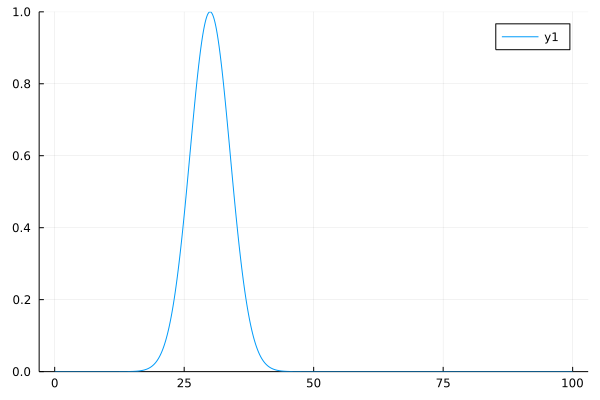

In [5]:
using Plots
using Printf
using LaTeXStrings

function Gaussian_profile(x)
    x0 = 30
    sigma = sqrt(15)
    prof = exp(-(x-x0)^2/(2*sigma^2))
    return prof
end

#spacial grid
x_i = 0
x_f = 100
Nx = 1000
x = LinRange(x_i, x_f, Nx)

#Criterio CFL
v = 0.2 #velocity
CFL = 0.1
dx = x[2] - x[1]
dt = CFL*dx/abs(v)

#time grid
t_i = 0
t_f = 1000
Nt = round(Int64, (t_f - t_i)/dt)
t = LinRange(t_i, t_f, Nt)

#flux function
flux(psi::Float64,v::Float64) = v*psi

function Finite_Volume_try1(Psi0, F, t, x, v, dt, dx, boundary = "outflow")
    nx = length(x)
    nt = length(t)
    psi = zeros(nt, nx)
    psi[1,1:length(x)] = Psi0.(x)
    psi_upwind = psi[1,1]
    psi_downwind = psi[1,nx]
    nu = (v*dt)/dx
    psi_half = zeros(nx-1)
    for n in 1:length(t)-1
        #Riemman's problem
        if v>0
            for j in 2:nx-1
                psi_half[j] = psi[n,j] + (dx)*0.5*(1-nu)*(psi[n,j+1] - psi[n,j-1])/(2*dx)
            end
            #lateral derivative
            psi_half[1] = psi[n,1] + (dx)*0.5*(1-nu)*(psi[n,2] - psi[n,1])/dx
        else
            for j in nx-2:-1:1
                psi_half[j] = psi[n,j+1] - (dx)*0.5*(1+nu)*(psi[n,j+2] - psi[n,j])/(2*dx)
            end
            #lateral derivative
            psi_half[nx-1] = psi[n,nx] - (dx)*0.5*(1+nu)*(psi[n,nx] - psi[n,nx-1])/dx
        end
            
        #Next step
        for j in 2:nx-1
            #First half - it depends on the boundary conditions
            psi[n+1,j] = psi[n,j] - (dt/dx)*(F(psi_half[j],v) - F(psi_half[j-1],v))
        end
            
        #Boundary conditions
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,nx] = psi[n+1,nx-1]
        else # Periodic boudnary conditions
            if v>0
                psi[n+1,1] = psi[n+1,nx-1]
                psi[n+1,nx] = psi[n+1,nx-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,nx] = psi[n+1,1]
            end
        end
    end
    return psi
end
#type of boundary conditions
boundary = "outflow"
psi_fv_outflow = Finite_Volume_try1(Gaussian_profile, flux, t, x, v, dt, dx, boundary)

@printf("dt = %0.10f \n", dt)
@printf("dx = %0.10f", dx)
anim = @animate for i in 1:50:Nt 
    plot(x, psi_fv_outflow[i,:], ylim = (0,1))
end
gif(anim, "Finite_Volume_gaussian_"*boundary*".gif", fps = 15)

#type of boundary conditions
boundary = "periodical"
psi_fv_period = Finite_Volume_try1(Gaussian_profile, flux, t, x, v, dt, dx, boundary)

@printf("dt = %0.10f \n", dt)
@printf("dx = %0.10f", dx)
anim = @animate for i in 1:50:Nt 
    plot(x, psi_fv_period[i,:], ylim = (0,1))
end
gif(anim, "Finite_Volume_gaussian_"*boundary*".gif", fps = 15)

### **Método basado en Spline**

Este método se basa representar la solución de la ecuación diferencial en diferentes regiones del mismo dominio como polinomios para formar una función a trozos a lo largo de todo el dominio, es decir, como si estuviéramos haciendo una interpolación de la función solución a partir de su ecuación diferencial. Esta representación no solo discretiza la las primeras y segundas derivadas, sino que extendible a todas las derivadas de mayor orden que tenga la función. 
